# Ejercicio 1

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [4]:
# Paso 1: Cargar el conjunto de datos
df= pd.read_csv("Publicacions Facebook Thailandia.csv")
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [7]:
filtered_df = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(filtered_df)


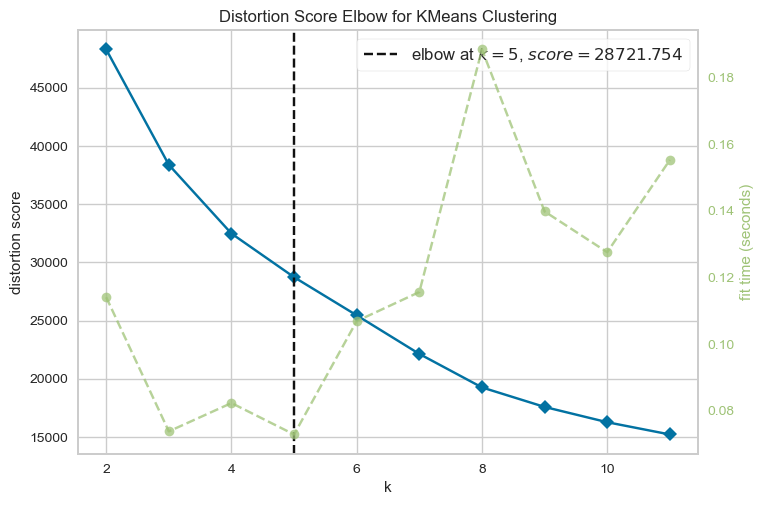

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Instanciar el modelo de agrupación y el visualizador
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(scaled_df)  # Ajustar los datos al visualizador
visualizer.show()          # Mostrar la figura


La localización del "codo" en un gráfico del método del codo es una forma común de seleccionar la cantidad óptima de grupos o "clusters" en los algoritmos de agrupamiento, como K-means.

En el gráfico del método del codo, el eje X representa el número de clusters y el eje Y representa una medida de la varianza total dentro de los clusters. En este caso, la medida es la suma de las distancias cuadradas dentro de los clusters, también conocida como WCSS (within-cluster sum of squares).

El "codo" es el punto del gráfico donde agregar más clusters no da como resultado una mejora significativa en la reducción de la varianza total dentro de los clusters. Este punto se llama "codo" porque el gráfico parece un brazo y este punto es donde el brazo se dobla como un codo.

Entonces, cuando dices "elbow at k = 5, score 28721", eso significa que según el método del codo, la cantidad óptima de clusters para tu conjunto de datos es 5. A partir de ese punto (k=5), agregar más clusters no reducirá significativamente el WCSS. El "score" de 28721 es el valor de WCSS en k=5. Específicamente, es la suma de las distancias cuadradas de cada punto de datos al centro de su cluster asignado, para todos los clusters.

In [17]:
# Paso 3: Crear el modelo de K-means y ajustar los datos
# Usamos 5 como el número de clusters para empezar, pero podrías cambiar este número para ver cómo afecta los resultados
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)

# Paso 4: Predice los clusters para cada publicación
df['cluster'] = kmeans.predict(scaled_df)

Filtrará las columnas relacionadas con las reacciones a las publicaciones, escalará estos datos para que todas las características sean igualmente importantes, creará y ajustará un modelo de K-means y finalmente añadirá una nueva columna al DataFrame original con la predicción del cluster para cada publicación.

Es importante tener en cuenta que el número de clusters que especificas en el algoritmo K-means puede afectar significativamente los resultados. Es posible que quieras experimentar con diferentes números de clusters para ver cuál proporciona los resultados que más te convienen.

In [21]:
# Añadimos las etiquetas de los clusters al dataframe original
df['cluster'] = kmeans.labels_

# Agrupar por etiquetas de cluster y calcular las medias
cluster_means = df.groupby('cluster').mean()

# Agrupar por etiquetas de cluster y calcular la desviación estándar
cluster_stds = df.groupby('cluster').std()

# Mostrar la media de cada cluster
print("Media de cada cluster:")
print(cluster_means)

# Mostrar la desviación estándar de cada cluster
print("\nDesviación estándar de cada cluster:")
print(cluster_stds)

Media de cada cluster:
         num_reactions  num_comments  num_shares    num_likes   num_loves  \
cluster                                                                     
0           109.854885     74.440932   16.558908   102.889687    6.004789   
1          1507.151515   1711.151515  751.818182  1075.787879  294.484848   
2          1823.311828     61.333333   11.645161  1817.534946    3.104839   
3           545.732240   2808.262295  405.508197   422.497268  111.010929   
4           429.933333    553.600000   58.400000   353.000000   41.333333   

           num_wows  num_hahas   num_sads  num_angrys  
cluster                                                
0          0.523148   0.287516   0.109834    0.037835  
1        103.727273  29.424242   1.939394    1.787879  
2          2.435484   0.198925   0.032258    0.005376  
3          3.830601   5.562842   1.502732    1.311475  
4          5.466667   1.866667  26.933333    1.333333  

Desviación estándar de cada cluster:
       

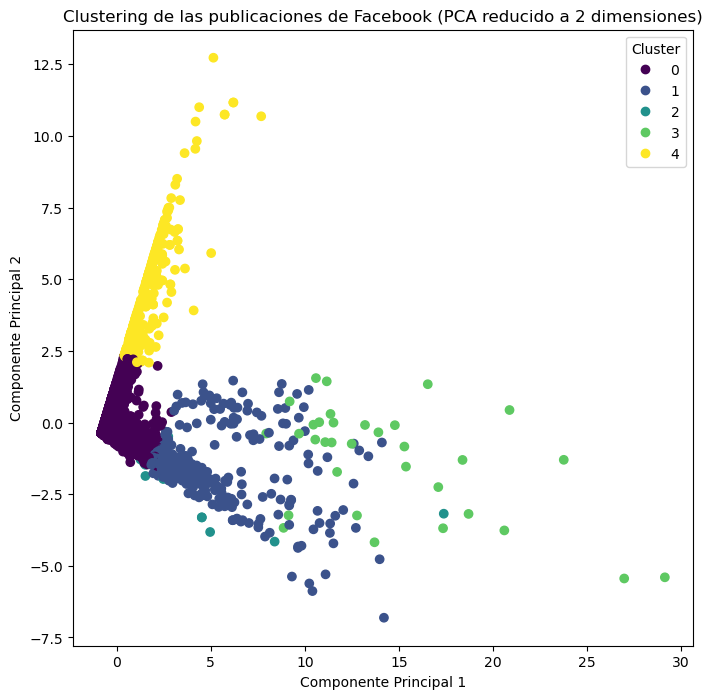

In [60]:
# Paso 5: Visualización
# Reducimos la dimensionalidad a 2 dimensiones para poder visualizarlo
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

# Creamos un DataFrame que tendrá las componentes principales y el cluster asignado para cada publicación
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = df['cluster']

# Creamos un gráfico de dispersión coloreado por cluster
plt.figure(figsize=(8, 8))
scatter = plt.scatter(pc_df['PC1'], pc_df['PC2'], c=pc_df['Cluster'], cmap='viridis')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering de las publicaciones de Facebook (PCA reducido a 2 dimensiones)')

plt.legend(title='Cluster', *scatter.legend_elements())
plt.show()

In [63]:

# Ajustamos el PCA a los datos
pca = PCA(n_components=2)
pca.fit(scaled_df)

# Imprimimos los componentes (vectores propios)
print("Vectores propios (componentes):")
print(pca.components_)

# Imprimimos la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Creamos un DataFrame para visualizar mejor las cargas
components_df = pd.DataFrame(pca.components_, columns=filtered_df.columns, index=['PC1', 'PC2'])

print(components_df)


Vectores propios (componentes):
[[ 0.30907269  0.34946824  0.44851821  0.26650635  0.46897169  0.31363136
   0.32011357  0.16911693  0.24653496]
 [ 0.61691615 -0.24234842 -0.21403039  0.6523404  -0.17429636  0.00742514
  -0.15088628 -0.13069625 -0.13799339]]
Varianza explicada por cada componente:
[0.3832663  0.19289793]
     num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
PC1       0.309073      0.349468    0.448518   0.266506   0.468972  0.313631   
PC2       0.616916     -0.242348   -0.214030   0.652340  -0.174296  0.007425   

     num_hahas  num_sads  num_angrys  
PC1   0.320114  0.169117    0.246535  
PC2  -0.150886 -0.130696   -0.137993  


El gráfico generado por el análisis de componentes principales (PCA) es una representación en 2D de la tabla de datos de alta dimensión. Cada punto en el gráfico representa una publicación de Facebook en la tabla, y la distancia entre los puntos se supone que refleja la similitud entre las publicaciones. Puntos que están más cerca unos de otros se consideran más similares que puntos que están más lejos.

Las direcciones de los ejes en un gráfico de PCA no corresponden a las variables específicas en la tabla (como 'num_reactions', 'num_comments', etc.). En cambio, los ejes son combinaciones de estas variables que explican la mayor cantidad de variación en los datos. El primer componente principal (eje x en este caso) es la combinación de variables que explica la mayor cantidad de variación, y el segundo componente principal (eje y) explica la segunda mayor cantidad de variación, y así sucesivamente.

En este caso específico, el gráfico de PCA se utiliza principalmente para visualizar los resultados del clustering. Los puntos se han coloreado de acuerdo al cluster al que se les ha asignado en el algoritmo de clustering jerárquico. Así, podemos ver cuántas publicaciones se asignaron a cada cluster y si las publicaciones en un mismo cluster tienden a ser similares (es decir, si tienden a agruparse en el gráfico).

# Ejercicio 2

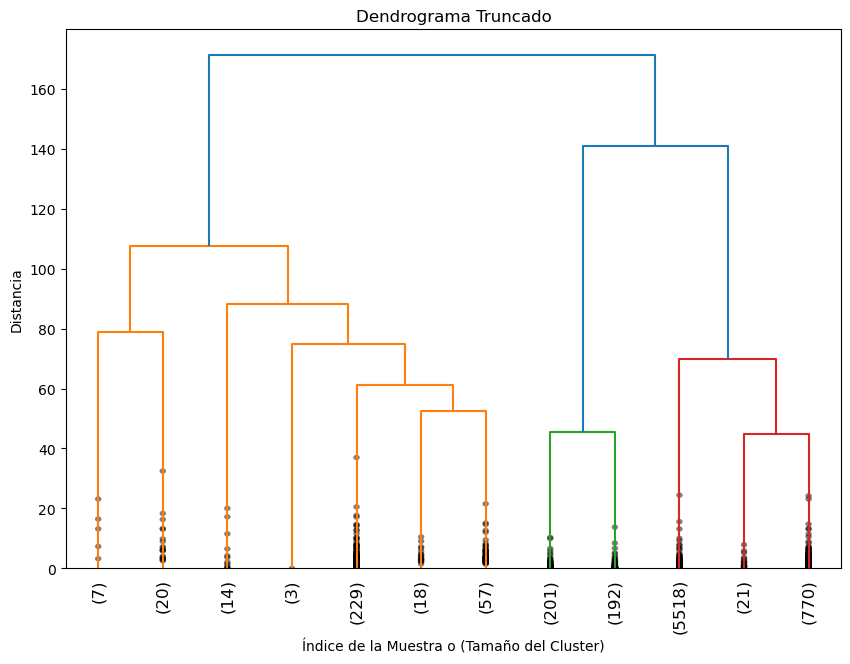

In [56]:

# Normalizamos los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(filtered_df)

# Aplicamos el clustering jerárquico
linked = linkage(scaled_df, 'ward')

# Creamos el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, 
           leaf_rotation=90., leaf_font_size=12., 
           show_contracted=True)
plt.title('Dendrograma Truncado')
plt.xlabel('Índice de la Muestra o (Tamaño del Cluster)')
plt.ylabel('Distancia')
plt.show()


En este gráfico, cada hoja del dendrograma representa una de las publicaciones de Facebook. A medida que te desplazas hacia arriba en el gráfico, las publicaciones se van agrupando de manera jerárquica, donde cada unión representa la formación de un nuevo cluster.

Es importante tener en cuenta que este método puede resultar costoso en términos de computación si tienes un conjunto de datos grande.

En este código, el parámetro truncate_mode='lastp' y p=12 significa que solo los últimos p=12 clusters fusionados se muestran en el dendrograma. Las etiquetas en el eje x representan el índice de la muestra o el tamaño del cluster, dependiendo de si se trata de una muestra individual o de un cluster fusionado.

En el eje Y, la altura a la que dos clusters se unen representa la distancia a la que se unen. Entonces, si dos clusters se unen a una altura baja, eso sugiere que son muy similares, ya que no había que recorrer mucha distancia para unirlos. Por otro lado, si dos clusters se unen a una altura alta, eso sugiere que son bastante diferentes, ya que había que recorrer una distancia considerable para unirlos.

En el eje X, el orden de los puntos de datos y clusters no tiene importancia intrínseca en la mayoría de los casos; solo se ordenan de esta manera para que el diagrama sea más fácil de leer y para que las ramas no se crucen tanto.

# Ejercicio 3

El coeficiente de silueta puede tomar valores en el rango [-1, 1]. Un valor cercano a 1 indica que la muestra está muy lejos de los clusters vecinos. Un valor cercano a 0 indica que la muestra está en o muy cerca del límite de decisión entre dos clusters vecinos y valores negativos indican que esas muestras podrían haberse asignado al cluster incorrecto.

In [42]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Definir el número de clusters que deseas
num_clusters = 3

# Usamos fcluster para obtener la asignación de cluster para cada muestra
# "maxclust" permite especificar el número de clusters que deseas
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print("Para n_clusters =", num_clusters,
      "El promedio del coeficiente de silueta es :", silhouette_avg)

Para n_clusters = 3 El promedio del coeficiente de silueta es : 0.7485709193412028


Este código primero utiliza fcluster para obtener las etiquetas de cluster para cada muestra basándose en el dendrograma producido por el clustering jerárquico. Luego, se utiliza la función silhouette_score de scikit-learn para calcular el promedio del coeficiente de silueta para todas las muestras. Un mayor valor de coeficiente de silueta indica una mejor asignación de muestras a clusters.

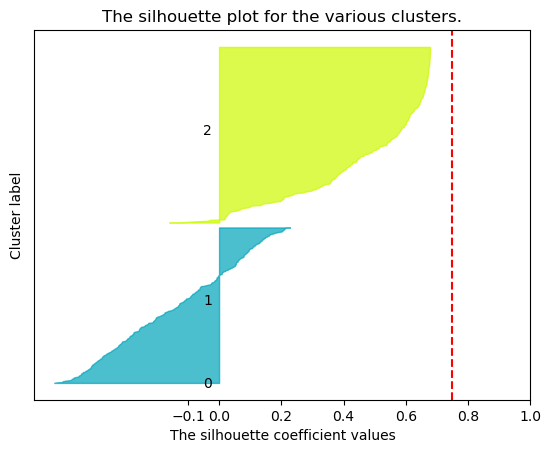

In [43]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import numpy as np

# Calcula el coeficiente de silueta para cada muestra
sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
y_lower = 10
for i in range(num_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()
